In [1]:
'''
Data Standardization => Implementation
Data Normalization => Implementation
Binning => What is Binning? 
'''
import pandas as pd

In [2]:
path = '/home/phd/auto.csv'
df = pd.read_csv('auto.csv', header=None)

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [4]:
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

In [5]:
df.columns = headers

In [6]:
import numpy as np

In [7]:
df.replace('?',np.nan, inplace=True)

In [8]:
df.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [9]:
m = df['normalized-losses'].astype('float').mean(axis=0)
df['normalized-losses'].replace(np.nan, m, inplace=True)

In [10]:
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         2
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 4
stroke               4
compression-ratio    0
horsepower           2
peak-rpm             2
city-mpg             0
highway-mpg          0
price                4
dtype: int64

In [11]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [12]:
df['normalized-losses'].head(20)

0     122
1     122
2     122
3     164
4     164
5     122
6     158
7     122
8     158
9     122
10    192
11    192
12    188
13    188
14    122
15    122
16    122
17    122
18    121
19     98
Name: normalized-losses, dtype: object

In [13]:
df['normalized-losses'] = df['normalized-losses'].astype('int')

In [14]:
df.dtypes

symboling              int64
normalized-losses      int32
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [15]:
df['peak-rpm']

0      5000
1      5000
2      5000
3      5500
4      5500
       ... 
200    5400
201    5300
202    5500
203    4800
204    5400
Name: peak-rpm, Length: 205, dtype: object

In [16]:
df['peak-rpm'] = df['peak-rpm'].astype('float')

In [17]:
df['peak-rpm']

0      5000.0
1      5000.0
2      5000.0
3      5500.0
4      5500.0
        ...  
200    5400.0
201    5300.0
202    5500.0
203    4800.0
204    5400.0
Name: peak-rpm, Length: 205, dtype: float64

In [18]:
# Data Standardization..... 
df['city-mpg']

0      21
1      21
2      19
3      24
4      18
       ..
200    23
201    19
202    18
203    26
204    19
Name: city-mpg, Length: 205, dtype: int64

In [19]:
df['highway-mpg']

0      27
1      27
2      26
3      30
4      22
       ..
200    28
201    25
202    23
203    27
204    25
Name: highway-mpg, Length: 205, dtype: int64

In [20]:
#L/100 KM = 235 / mpg value
df[['city-mpg','highway-mpg']]

,city-mpg,highway-mpg
0,21,27
1,21,27
2,19,26
3,24,30
4,18,22
...,...,...
200,23,28
201,19,25
202,18,23
203,26,27


In [21]:
df['city-mpg'] = 235 / df['city-mpg']

In [22]:
df['highway-mpg'] = 235/df['highway-mpg']

In [23]:
df[['city-mpg','highway-mpg']].head(20)

,city-mpg,highway-mpg
0,11.190476,8.703704
1,11.190476,8.703704
2,12.368421,9.038462
3,9.791667,7.833333
4,13.055556,10.681818
5,12.368421,9.400000
6,12.368421,9.400000
7,12.368421,9.400000
8,13.823529,11.750000
9,14.687500,10.681818


In [24]:
df.rename(columns={'city-mpg':'city-L/100KM'}, inplace=True)

In [25]:
df.rename(columns={'highway-mpg':'highway-L/100KM'},inplace=True)

In [26]:
df[['city-L/100KM','highway-L/100KM']].head(20)

,city-L/100KM,highway-L/100KM
0,11.190476,8.703704
1,11.190476,8.703704
2,12.368421,9.038462
3,9.791667,7.833333
4,13.055556,10.681818
5,12.368421,9.400000
6,12.368421,9.400000
7,12.368421,9.400000
8,13.823529,11.750000
9,14.687500,10.681818


In [27]:
'''
......Normalization..... 
Range ==> 0 --- 1

168.8  => 168.8/188.8 ==> 0 -- 1
168.8  => 168.8/188.8 ==> 0 -- 1
171.2  => 171.2/188.8 ==> 0 -- 1
176.6  => 176.6/188.8 ==> 0 -- 1
188.8  => 188.8/188.8 ==> 1

'''
df['length']

0      168.8
1      168.8
2      171.2
3      176.6
4      176.6
       ...  
200    188.8
201    188.8
202    188.8
203    188.8
204    188.8
Name: length, Length: 205, dtype: float64

In [28]:
df['length'].min()

141.1

In [29]:
df['length'].max()

208.1

In [30]:
df[['length','width','height']].head(20)

,length,width,height
0,168.8,64.1,48.8
1,168.8,64.1,48.8
2,171.2,65.5,52.4
3,176.6,66.2,54.3
4,176.6,66.4,54.3
5,177.3,66.3,53.1
6,192.7,71.4,55.7
7,192.7,71.4,55.7
8,192.7,71.4,55.9
9,178.2,67.9,52.0


In [31]:
df['length'] = df['length']/df['length'].max()

In [32]:
df['length'].head()

0    0.811148
1    0.811148
2    0.822681
3    0.848630
4    0.848630
Name: length, dtype: float64

In [33]:
df['length'].max()

1.0

In [34]:
df['length'].min()

0.6780394041326285

In [35]:
df['width']  = df['width'] /df['width'].max()

In [36]:
df['height'] = df['height']/df['height'].max()

In [37]:
df[['length','height','width']].head(27)

,length,height,width
0,0.811148,0.816054,0.886584
1,0.811148,0.816054,0.886584
2,0.822681,0.876254,0.905947
3,0.848630,0.908027,0.915629
4,0.848630,0.908027,0.918396
5,0.851994,0.887960,0.917012
6,0.925997,0.931438,0.987552
7,0.925997,0.931438,0.987552
8,0.925997,0.934783,0.987552
9,0.856319,0.869565,0.939142


In [38]:
''' Binning + Visualization '''
# matplotlib
# seaborn

' Binning + Visualization '

In [39]:
avg=df['horsepower'].astype("float").mean(axis=0)

In [40]:
df["horsepower"].replace(np.nan, avg, inplace=True)
df['horsepower'] = df['horsepower'].astype('int')


In [41]:
import matplotlib as plt
from matplotlib import pyplot


(array([55., 49., 51., 13., 23.,  8.,  4.,  0.,  1.,  1.]),
 array([ 48.,  72.,  96., 120., 144., 168., 192., 216., 240., 264., 288.]),
 <BarContainer object of 10 artists>)

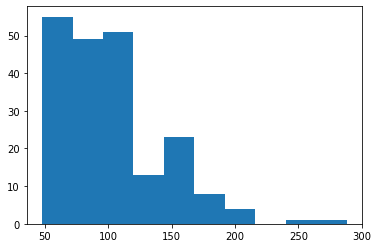

In [42]:
plt.pyplot.hist(df['horsepower'])

(array([55., 49., 51., 13., 23.,  8.,  4.,  0.,  1.,  1.]),
 array([ 48.,  72.,  96., 120., 144., 168., 192., 216., 240., 264., 288.]),
 <BarContainer object of 10 artists>)

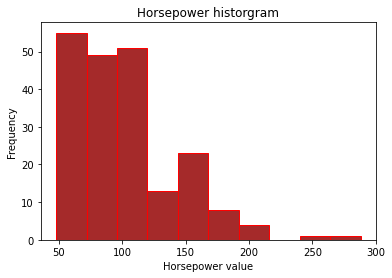

In [43]:
plt.pyplot.title('Horsepower historgram')
plt.pyplot.xlabel('Horsepower value')
plt.pyplot.ylabel('Frequency')
plt.pyplot.hist(df['horsepower'], color='brown',ec='red')

In [47]:
df.isnull().sum

<bound method DataFrame.sum of      symboling  normalized-losses   make  fuel-type  aspiration  num-of-doors  \
0        False              False  False      False       False         False   
1        False              False  False      False       False         False   
2        False              False  False      False       False         False   
3        False              False  False      False       False         False   
4        False              False  False      False       False         False   
..         ...                ...    ...        ...         ...           ...   
200      False              False  False      False       False         False   
201      False              False  False      False       False         False   
202      False              False  False      False       False         False   
203      False              False  False      False       False         False   
204      False              False  False      False       False         False 

In [51]:
df.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,horsepower,peak-rpm,city-L/100KM,highway-L/100KM
symboling,1.000000,0.465190,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.178515,0.071380,0.274573,0.063165,-0.030190
normalized-losses,0.465190,1.000000,-0.056518,0.019209,0.084195,-0.370706,0.097785,0.110997,-0.114525,0.203434,0.237748,0.232682,0.178527
wheel-base,-0.531954,-0.056518,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.249786,0.351985,-0.361052,0.474040,0.578128
length,-0.357612,0.019209,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.158414,0.554408,-0.287325,0.659165,0.711597
width,-0.232919,0.084195,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.181129,0.642176,-0.219957,0.682850,0.728044
height,-0.541038,-0.370706,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.261214,-0.110114,-0.322272,-0.002333,0.085892
curb-weight,-0.227691,0.097785,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.151362,0.750973,-0.266306,0.791911,0.836742
engine-size,-0.105790,0.110997,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.028971,0.810705,-0.244618,0.744952,0.777077
compression-ratio,-0.178515,-0.114525,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,1.000000,-0.205717,-0.436221,-0.296964,-0.223411
horsepower,0.071380,0.203434,0.351985,0.554408,0.642176,-0.110114,0.750973,0.810705,-0.205717,1.000000,0.130971,0.871708,0.801418


In [56]:
import seaborn as sns;
import matplotlib as pltlot.pie()

ValueError: 'explode' must be of length 'x'

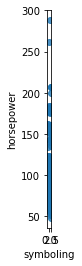

In [65]:
sns.regplot (x="symboling",y="horsepower",data=df)
plt.pyplot.pie(df['horsepower'].value_counts(),explode=[0,0,1,0,])